# A simple DFT calculation

In [12]:
import psi4
import numpy as np

psi4.set_memory(int(2e9))
psi4.core.set_output_file('output.dat', False)


In [32]:
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.1
""")

psi4.energy('scf/cc-pvdz')

-76.02663646061744

In [14]:
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

Optimizer: Optimization complete!


-76.02703268911131

In [15]:
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

In [16]:
e = scf_e * psi4.constants.hartree2kcalmol
print("Water has a Energy of {:.2f} kcal/mol".format(e))


Water has a Energy of -47707.68 kcal/mol


9

C      0.947210   -0.032539    0.006768
C     -0.513540   -0.274228   -0.226357
O     -1.173341    0.948982    0.011803
H      1.402735   -0.752157    0.727744
H      1.162151    1.005239    0.378556
H      1.457267   -0.114186   -0.976477
H     -0.738303   -0.617200   -1.266553
H     -0.938713   -1.062133    0.443102
H     -1.605466    0.898222    0.901415



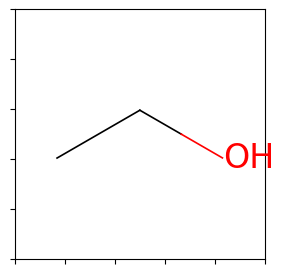

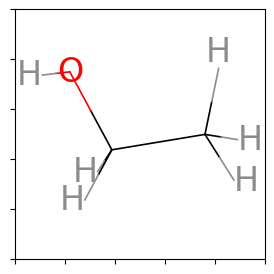

In [33]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt

myMoleculeSMILES = 'CCO'
myMolecule = Chem.MolFromSmiles(myMoleculeSMILES)
Draw.MolToMPL(myMolecule, size=(100, 100))
myMolecule = Chem.AddHs(myMolecule)  # Add implicit hydrogens
AllChem.EmbedMolecule(myMolecule) # Embed molecule in 3D space
print(Chem.MolToXYZBlock(myMolecule)) # Print coordinates

Draw.MolToMPL(myMolecule, size=(100, 100))

mol = psi4.geometry(Chem.MolToXYZBlock(myMolecule))

In [34]:
psi4.optimize('scf/cc-pvdz', molecule=mol)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 1.19e-05

	Change in internal coordinate of 5.16e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 5.23e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 6.56e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 8.58e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 8.65e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 8.04e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 1.01e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.01e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in inte

Optimizer: Optimization complete!


-154.09263149307012

In [27]:
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=mol, return_wfn=True)

In [28]:
scf_e

-154.09268840053312

In [59]:
xyz = psi4.core.Molecule.to_string(mol,dtype='xyz+')


In [81]:
import psi4
from rdkit import Chem
from rdkit.Chem import AllChem

def calculate_energy(smiles):
    # Convert SMILES to RDKit molecule
    molecule = Chem.MolFromSmiles(smiles)

    # Generate 3D coordinates and convert to XYZ format
    molecule = Chem.AddHs(molecule)
    AllChem.EmbedMolecule(molecule)
    xyz = Chem.MolToXYZBlock(molecule)

    # Create PSI4 molecule from XYZ coordinates
    mol = psi4.geometry(xyz)

    # Perform geometry optimization
    psi4.optimize('scf/cc-pvdz', molecule=mol)

    # Perform frequency calculation
    scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=mol, return_wfn=True)

    # Convert energy to kJ/mol
    e = scf_e * psi4.constants.hartree2kJmol

    return e


In [82]:
O2 = calculate_energy("[O][O]")
H2O = calculate_energy("O")
CH4 = calculate_energy("C")
CO2 = calculate_energy("C(=O)=O")



Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!



	The following linear bends should be present:
  L(2,1,3), already present.
	 l(2,1,3), already present.

AlgError: Exception created. Mesg: New linear angles
AlgError: New bends detected.

 Caught AlgError exception

 Erasing history.



Optimizer: Optimization complete!


In [83]:
educts = CH4+2*O2
products = CO2+2*H2O

In [84]:
products-educts

-1083.6414877256611